---


```

RECONNAISSANCE VISUELLE DE TAGS

Partie 2/2

Author : Tariq CHELLALI
Last update : 04/12/2022

```


---

# **Importing Libraries**

---



In [ ]:
import pandas as pd
import numpy as np

# **Connecting to the drive storage**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's import our structured dataset.

In [ ]:
df = pd.read_csv('../content/drive/MyDrive/Cleaned_not_normlized_data.csv ')

In [ ]:
df.head()

Unnamed: 0  image_id  upper_left_x  upper_left_y  upper_right_x  \
0           0      2755    475.484802    198.497635     543.919495   
1           1      2770    678.720703    169.226242     718.334351   
2           2      2743    409.816040    186.480392     505.300385   
3           3      2747    420.752075    184.034714     505.099243   
4           4      2762    582.551636    196.459000     638.541687   

   upper_right_y  lower_left_x  lower_left_y  lower_right_x  lower_right_y  
0     207.803116    467.549103    269.072296     535.729736     280.015991  
1     182.874359    674.041260    230.610672     717.986389     245.686584  
2     194.213928    402.754700    282.376923     497.874695     292.348511  
3     193.409683    412.004150    268.517883     496.114014     280.287659  
4     209.454437    574.171875    261.492767     630.238586     275.127228

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2023 non-null   int64  
 1   image_id       2023 non-null   int64  
 2   upper_left_x   2023 non-null   float64
 3   upper_left_y   2023 non-null   float64
 4   upper_right_x  2023 non-null   float64
 5   upper_right_y  2023 non-null   float64
 6   lower_left_x   2023 non-null   float64
 7   lower_left_y   2023 non-null   float64
 8   lower_right_x  2023 non-null   float64
 9   lower_right_y  2023 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 158.2 KB


In [ ]:
df.describe()

Unnamed: 0     image_id  upper_left_x  upper_left_y  upper_right_x  \
count  2023.000000  2023.000000   2023.000000   2023.000000    2023.000000   
mean   1011.000000  1956.839842    300.470559    169.746101     371.615864   
std     584.134117  1017.131885    120.213670     58.166697     131.843604   
min       0.000000   227.000000      3.119167     -6.764982      17.993757   
25%     505.500000  1269.500000    227.270088    142.573265     284.007736   
50%    1011.000000  1935.000000    290.132355    179.915024     386.991272   
75%    1516.500000  2673.500000    370.552551    206.671677     462.116409   
max    2022.000000  3779.000000    693.021484    361.952271     718.334351   

       upper_right_y  lower_left_x  lower_left_y  lower_right_x  lower_right_y  
count    2023.000000   2023.000000   2023.000000    2023.000000    2023.000000  
mean      175.907226    296.864854    249.958324     372.966280     251.832869  
std        60.993946    121.417018     77.275908     134.628914      77.573513  
min        -1.970952     -2.761499     14.832405      17.978712      15.414351  
25%       149.718376    224.258553    211.003647     278.897415     214.012634  
50%       180.907623    286.855011    245.527161     389.520203     244.775269  
75%       207.284561    362.516144    284.886169     472.669022     287.266342  
max       377.864532    694.761414    512.608887     718.056519     511.219757

Let's see if there's is any NaaN values in our dataframe

In [ ]:
df.isna().sum()

Unnamed: 0       0
image_id         0
upper_left_x     0
upper_left_y     0
upper_right_x    0
upper_right_y    0
lower_left_x     0
lower_left_y     0
lower_right_x    0
lower_right_y    0
dtype: int64

Good ! clean ❤

Let's get rid our unnacessery columns, like : *unnamed* column

In [ ]:
df = df.drop("Unnamed: 0", axis='columns')

In [ ]:
df

image_id  upper_left_x  upper_left_y  upper_right_x  upper_right_y  \
0         2755    475.484802    198.497635     543.919495     207.803116   
1         2770    678.720703    169.226242     718.334351     182.874359   
2         2743    409.816040    186.480392     505.300385     194.213928   
3         2747    420.752075    184.034714     505.099243     193.409683   
4         2762    582.551636    196.459000     638.541687     209.454437   
...        ...           ...           ...            ...            ...   
2018       687    640.036377    225.596756     666.000122     227.458862   
2019       654    262.112122    250.582565     317.077637     252.316238   
2020       639    403.927734    242.860352     457.799622     245.357269   
2021       662    261.432404    242.147293     309.357666     244.179321   
2022       646    319.664185    248.228119     376.351563     252.000488   

      lower_left_x  lower_left_y  lower_right_x  lower_right_y  
0       467.549103    269.072296     535.729736     280.015991  
1       674.041260    230.610672     717.986389     245.686584  
2       402.754700    282.376923     497.874695     292.348511  
3       412.004150    268.517883     496.114014     280.287659  
4       574.171875    261.492767     630.238586     275.127228  
...            ...           ...            ...            ...  
2018    642.491150    264.821136     668.388489     265.601929  
2019    266.895020    314.557709     322.953369     310.601013  
2020    412.171417    312.154419     466.884491     307.447235  
2021    264.231964    296.798462     313.052826     294.630493  
2022    324.930115    317.362640     382.944519     314.015900  

[2023 rows x 9 columns]

In [ ]:
df = df.sort_values(by=['image_id'])

  now let's sort our dataframe, to see our images in order.

In [ ]:
df

image_id  upper_left_x  upper_left_y  upper_right_x  upper_right_y  \
1643       227    131.873993    209.641357     142.941315     207.698578   
1644       228    151.029144    211.321945     161.948318     209.531540   
1642       229    170.890121    212.268402     181.871445     210.190247   
1651       230    191.975235    212.523743     202.951065     210.797668   
1649       231    213.982193    212.549957     224.978226     211.217056   
...        ...           ...           ...            ...            ...   
405       3775     97.305313    203.787796     129.837845     200.630112   
418       3776     75.383705    208.405807     106.913513     204.911713   
422       3777     53.419895    212.934021      83.717812     209.471542   
412       3778     29.629885    216.716034      58.731682     213.323196   
411       3779      4.984624    217.423538      32.814316     213.897903   

      lower_left_x  lower_left_y  lower_right_x  lower_right_y  
1643    132.996048    225.730392     143.269821     224.154160  
1644    151.165543    227.338226     162.180893     225.755295  
1642    171.724426    227.790741     182.736084     226.510696  
1651    191.999298    228.320648     203.189865     226.766754  
1649    213.964447    228.265594     225.242828     227.057007  
...            ...           ...            ...            ...  
405      99.307648    241.474854     132.496643     236.748932  
418      77.322105    245.793289     109.491898     240.882187  
422      55.276077    250.242508      86.309769     245.146896  
412      31.350027    253.913666      61.225128     249.038605  
411       6.383572    254.590622      34.754356     249.932770  

[2023 rows x 9 columns]

# **Data Pre-processing**

---



It might be strange to see that i'm trying to pre-proccess our data even if the part 1 mission was all about that. Well,  it's because i know that it's 70% of the work we have to do when building a deep learning/Machine Learning Model !

- ***Normalisation*** for exemple is used here to avoid Vanishing problems.
- ***Train and test split / Cross validation*** is used for avoiding Overfitting problems.
- ***Data augmentation*** is a wise method to prepare our dataset for our deep learning model.

So when we have a clean,  normalised and processed dataset, we have high level probability to find good predictions.

By the way, this is problem of regression in case we didn't mention it earlier ! And our Target values are the coordianates of the tag.  

Importing libraries for data pre-processing

In [ ]:
from sklearn.model_selection import train_test_split # Train_test_split function used for split our data to two, data used for training our model and data used for testing our model
from tensorflow.keras.preprocessing.image import load_img, img_to_array # load_img is function used to load an img and img_to_array to transform a float to an array
from imutils import paths # like we said in previous section, paths is used for
import os # for processing paths
import cv2 # for read our images and processing them

We need to process our data to prepare it for our deep learning model,

In [ ]:
dataset = "../content/drive/MyDrive/images/images" # Our dataset of images, we might still need it !

Our ***taget Values*** are the coordinnate of our bounding box :

*   upper_left_x	upper_left_y
*   upper_right_x	upper_right_y
*   lower_left_x	lower_left_y
*   lower_right_x	lower_right_y

In [ ]:
#extract our target Values from the dataframe
df.iloc[:,1:]

upper_left_x  upper_left_y  upper_right_x  upper_right_y  lower_left_x  \
1643    131.873993    209.641357     142.941315     207.698578    132.996048   
1644    151.029144    211.321945     161.948318     209.531540    151.165543   
1642    170.890121    212.268402     181.871445     210.190247    171.724426   
1651    191.975235    212.523743     202.951065     210.797668    191.999298   
1649    213.982193    212.549957     224.978226     211.217056    213.964447   
...            ...           ...            ...            ...           ...   
405      97.305313    203.787796     129.837845     200.630112     99.307648   
418      75.383705    208.405807     106.913513     204.911713     77.322105   
422      53.419895    212.934021      83.717812     209.471542     55.276077   
412      29.629885    216.716034      58.731682     213.323196     31.350027   
411       4.984624    217.423538      32.814316     213.897903      6.383572   

      lower_left_y  lower_right_x  lower_right_y  
1643    225.730392     143.269821     224.154160  
1644    227.338226     162.180893     225.755295  
1642    227.790741     182.736084     226.510696  
1651    228.320648     203.189865     226.766754  
1649    228.265594     225.242828     227.057007  
...            ...            ...            ...  
405     241.474854     132.496643     236.748932  
418     245.793289     109.491898     240.882187  
422     250.242508      86.309769     245.146896  
412     253.913666      61.225128     249.038605  
411     254.590622      34.754356     249.932770  

[2023 rows x 8 columns]

As we said earlier (and part1), we might need to normalize our coordinates. *Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.*

It's used because normalized data helps us converge faster when trainning our model.

There are many methods to normalize our data. Here, our Normalization consist of dividing our x-coordinates with the width of the corresponding array image and our y-coordinates with the height of the corresponding array image.

Let's import our normalized dataset that we process it from the previous part.

In [ ]:
df1 = pd.read_csv('../content/drive/MyDrive/cleaned_and_normalized_dataset.csv ') # read our csv file and import it as a dataframe

Let's clean and check our dataframe again . (important)

In [ ]:
df1 = df1.drop("Unnamed: 0", axis='columns') # Delete unnecessary column
df1 = df1.astype({'image_id': int,
                }) # Change type column of  'image_id'

In [ ]:
df1 = df1.sort_values(by=['image_id']) #Sort values by image_id column
df1

image_id  upper_left_x  upper_left_y  upper_right_x  upper_right_y  \
1643       227      0.183158      0.388225       0.198530       0.384627   
1644       228      0.209763      0.391337       0.224928       0.388021   
1642       229      0.237347      0.393090       0.252599       0.389241   
1651       230      0.266632      0.393562       0.281876       0.390366   
1649       231      0.297197      0.393611       0.312470       0.391143   
...        ...           ...           ...            ...            ...   
405       3775      0.135146      0.377385       0.180330       0.371537   
418       3776      0.104700      0.385937       0.148491       0.379466   
422       3777      0.074194      0.394322       0.116275       0.387910   
412       3778      0.041153      0.401326       0.081572       0.395043   
411       3779      0.006923      0.402636       0.045575       0.396107   

      lower_left_x  lower_left_y  lower_right_x  lower_right_y  
1643      0.184717      0.418019       0.198986       0.415100  
1644      0.209952      0.420997       0.225251       0.418065  
1642      0.238506      0.421835       0.253800       0.419464  
1651      0.266666      0.422816       0.282208       0.419938  
1649      0.297173      0.422714       0.312837       0.420476  
...            ...           ...            ...            ...  
405       0.137927      0.447176       0.184023       0.438424  
418       0.107392      0.455173       0.152072       0.446078  
422       0.076772      0.463412       0.119875       0.453976  
412       0.043542      0.470210       0.085035       0.461183  
411       0.008866      0.471464       0.048270       0.462838  

[2023 rows x 9 columns]

In [ ]:
# Split our data to extract target values

labels = df1.iloc[:,1:].values # Dataframe that contains all the coordinates of our april tags
data = df1.iloc[:,:1].values #Dataframe that contains all the images ids (column n°1)

X = [] # Umpty list used to store, later, our images arrays (normalized)
Y = [] # Umpty list used to store, later, our target values (coordinates)

for i in range (0,len(df1)): #loop over the length of our dataframe, More specificaly, we are looping in each row of our dataframe which mean every id images of our dataset
  label_norm = (labels[i][0],labels[i][1],labels[i][2],labels[i][3],labels[i][4],labels[i][5],labels[i][6],labels[i][7]) # store our coordinates in a single tuple
  Y.append(label_norm) # Insert the value stored previousely in our target list
  if len(str(data[i][0])) == 3 : # this is condition on the img id in our dataframe to see if their length is equal to 3, if true
    output = r'../content/drive/MyDrive/images/images/img_000'+str(data[i][0])+'.png' # we extract our image path using the right path
    img_arr = cv2.imread(output) # we convert our image to an array
    load_image = load_img(output,target_size=(224,224)) # we load our image
    load_image_arr = img_to_array(load_image) # we convert our image to an array
    norm_load_image_arr = load_image_arr/255.0 # we normalized our arrays with 255 ( max value of inrensity colors in an RGB image )
    X.append(norm_load_image_arr) # we insert our normalized images arrays in our list
  if len(str(data[i][0])) == 4 :  # this is condition on the img id in our dataframe to see if their length is equal to 4, if true
    output = r'../content/drive/MyDrive/images/images/img_00'+str(data[i][0])+'.png' # we extract our image path using the right path
    img_arr = cv2.imread(output)
    load_image = load_img(output,target_size=(224,224)) # we load our image
    load_image_arr = img_to_array(load_image)# we convert our image to an array
    norm_load_image_arr = load_image_arr/255.0  # we normalized our arrays with 255 ( max value of inrensity colors in an RGB image )
    X.append(norm_load_image_arr) # we insert our normalized images arrays in our list

In [ ]:
X = np.array(X,dtype=np.float32) # Convert our list of  images arrays (normalized)  to a numpy array
y = np.array(Y,dtype=np.float32) # Convert our list of target values (coordinates) to a numpy array

In [ ]:
X.shape,y.shape # visualise the shape of our two numpy arrays

((2023, 224, 224, 3), (2023, 8))

# **Train and test split**

---



This is an import step in our journey ! We must split our data into two datasets. the first dataset will be used for trainning of our model and the second will be used to test our model.
### We must also split our data to a ***Validation set*** used to validate our model performance during training.
---
**The trainning set :**It is the set of data that is used to train and make the model learn the hidden features/patterns in the data.

**The Test Set** :it is the set of data used to test the model after completing the training

Here, we use the function from tensorFlow Keras train_test_split

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=0) # 80% of our dataset is used for tranning and 20% for testing our model
x_train.shape,x_test.shape,y_train.shape,y_test.shape # visualise the shape of our different sets

((1618, 224, 224, 3), (405, 224, 224, 3), (1618, 8), (405, 8))

# **Building our deep Learning Model**

---



After this long journey of pre-processing our dataset, we now have come to our main mission task, we need to train our deep learning model.

Ther's two ways we can work on this step:  

*   First road : We could build a neural network from scratch with Tensorflow tools
*   Second road : We could build only the headmodel (initial hidden layers) and import a pre-trainned model also with TensorFlow-keras tools. this approach is called **Transfer Learning**.

Neither of these two steps are easy, because :

The complexity of first step is that we need to build and choose the right convulational layer, hidden layers with the right activation function , the right  and the number of neurons in each hidden layers and it takes some time to find an efficient model with the right hyperparameters. (this approach could take weeks of research)

The complexity of the second step is that we need also time to find the right hyperparameters. However, it's less time- and resource-consuming comparing to the first approach. Because, we have higher chance to have some interesting results with the pre-trained model and solve the mission much quicker. Also many documentation confirms that models that are pre-trained are good at detecting high-level features (edges, patterns..) Therefore, we have a quicker convergence.

---



For efficiency reasons, we chose the second approach. We will use some of the most popular models that exists today : For instance, MobileNetV2, InceptionV3 InceptionResNetV2.

**Let's import the necessary functions from the tensorflow-Keras Library :**


In [ ]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2 # import popular pre-trained models from the tensoflow-keras library
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten # Import necessary functions to build our headmodel
from tensorflow.keras.models import Model
import tensorflow as tf # import tensorflow
from tensorflow.keras.callbacks import TensorBoard # TensorBoard gives us some intersting matrics about the performance of our model
import matplotlib.pyplot as plt


Let's start building our headmodel and importing our pre-trainned model. First we chose the InceptionResNetV2 pre-trainned Model.

In [ ]:
inception_resnet = InceptionResNetV2(weights = "imagenet", include_top=False, input_tensor=Input(shape=(224,224,3))) # We import our pre-trained model
inception_resnet.trainable=False
#headmodel-----------------------
headmodel = inception_resnet.output # we specify the output as our pre-trained model
headmodel = Flatten()(headmodel) # flatten
headmodel = Dense(500,activation="relu")(headmodel) # add Dense hidden layyer with 500 neurons output and a Relu activation function
headmodel = Dense(250,activation="relu")(headmodel) # add Dense hidden layyer with 250 neurons output and a Relu activation function
headmodel = Dense(8,activation='sigmoid')(headmodel) # We have 8 output (8 coordinates to predict) !
#model------------------------
model = Model(inputs=inception_resnet.input,outputs=headmodel) #

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
#compile model, we configure the model for trainning
#since it's a regression problem, we choose a MSE (Mean Squared Error) as our loss function
# we choose an adam optimizer
# Learning rate of 1e-4
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
tfb = TensorBoard('object_detection') # We configure our Tensorboard

# ***Start trainning (Fit our Model):***

---


We start our training with
*   20 epochs
*   5 batch size

In [ ]:
#fit our Model
History = model.fit(x=x_train, y=y_train, batch_size=5,epochs=20, validation_data=(x_test,y_test), callbacks=[tfb])

Epoch 1/20
324/324 [==============================] - 643s 2s/step - loss: 0.0486 - val_loss: 0.0254
Epoch 2/20
324/324 [==============================] - 665s 2s/step - loss: 0.0167 - val_loss: 0.0070
Epoch 3/20
324/324 [==============================] - 681s 2s/step - loss: 0.0052 - val_loss: 0.0049
Epoch 4/20
324/324 [==============================] - 695s 2s/step - loss: 0.0040 - val_loss: 0.0042
Epoch 5/20
324/324 [==============================] - 657s 2s/step - loss: 0.0034 - val_loss: 0.0035
Epoch 6/20
324/324 [==============================] - 606s 2s/step - loss: 0.0031 - val_loss: 0.0038
Epoch 7/20
324/324 [==============================] - 645s 2s/step - loss: 0.0026 - val_loss: 0.0035
Epoch 8/20
324/324 [==============================] - 643s 2s/step - loss: 0.0027 - val_loss: 0.0039
Epoch 9/20
324/324 [==============================] - 632s 2s/step - loss: 0.0026 - val_loss: 0.0040
Epoch 10/20
324/324 [==============================] - 623s 2s/step - loss: 0.0020 - val_lo

# **Evaluation**

---



Training Done ! it took 3 hours to train. Let's plot our history loss to see the performance of our training.

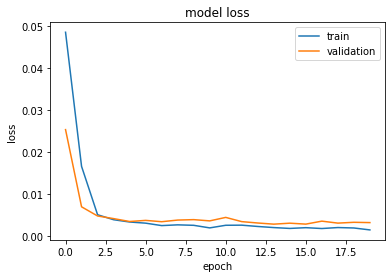

In [ ]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

We see that we have pretty nice plot :
We see that our tranning and validation loss decreases to a point of stability.
the loss on the trainning set is lower than the validation dataset

I think that this model could be improved a little more changed some **hyperparameters**. Like for example :

*   Increasing the number of trainning epochs
*   Increasing the number of batch size
*   Increasing the number of neurones
*   Adding some hidden layers


# **Tensorbord**
---

We could also visualise our loss curves in the tensorbord. as we said earlier :

- *We see that we have pretty nice plot :*
- *We see that our tranning and validation loss decreases to a point of stability.*
- the loss on the trainning set is lower than the validation dataset
- No overfitting Nore underfitting problems shown
- A curve between overfitting and underfitting


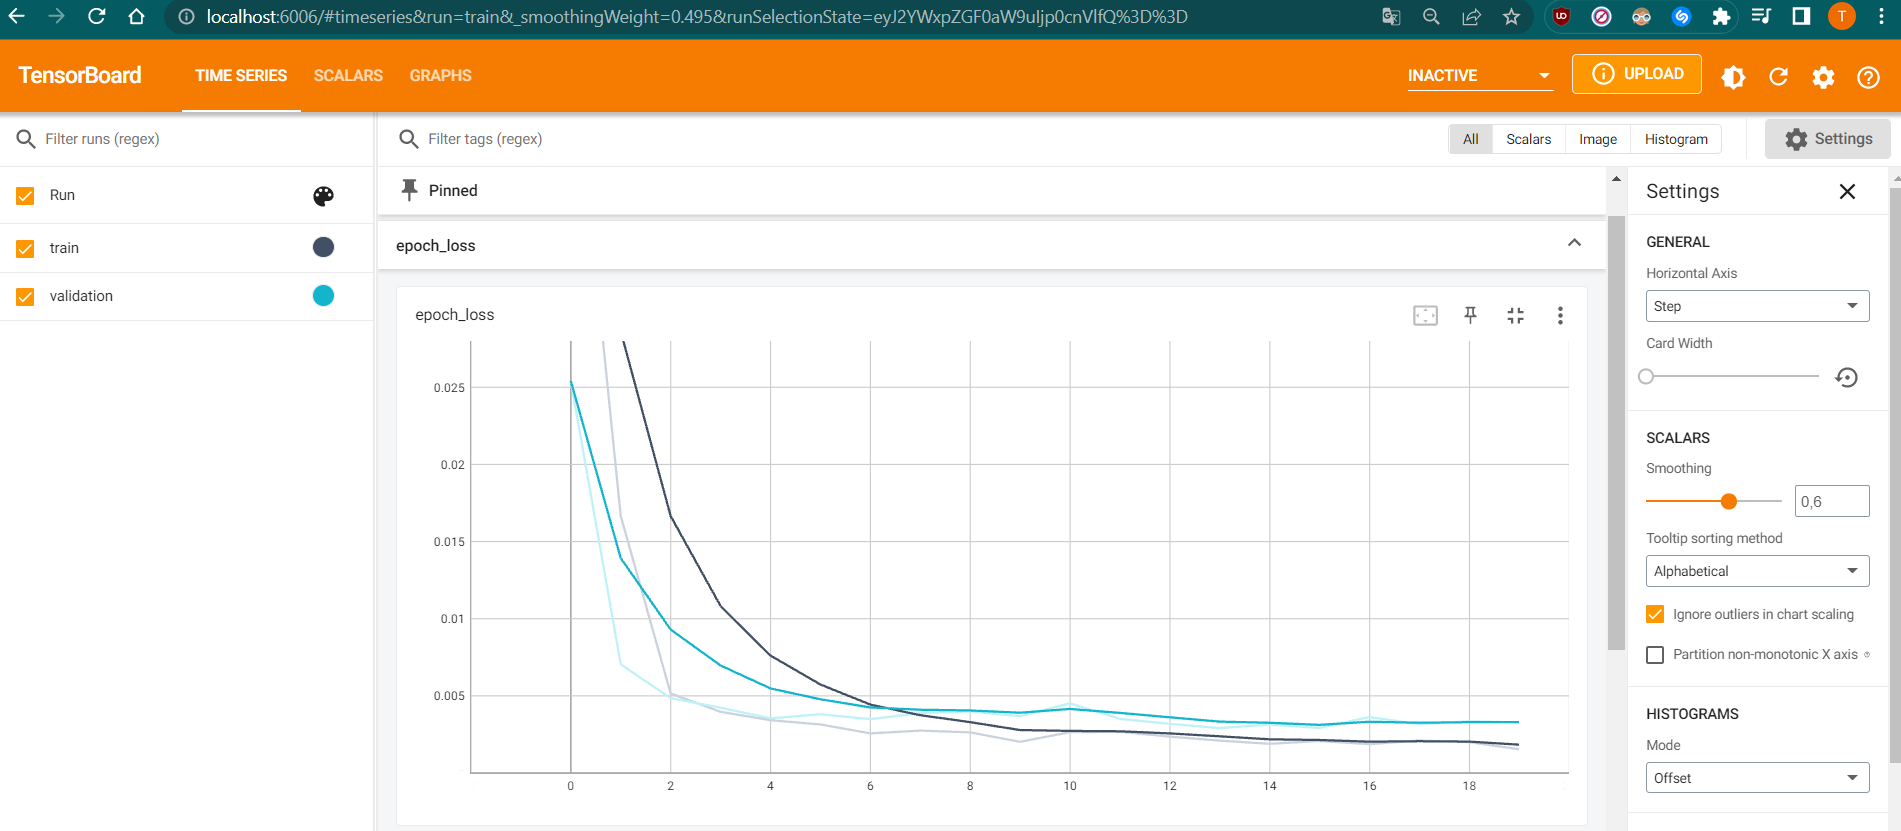

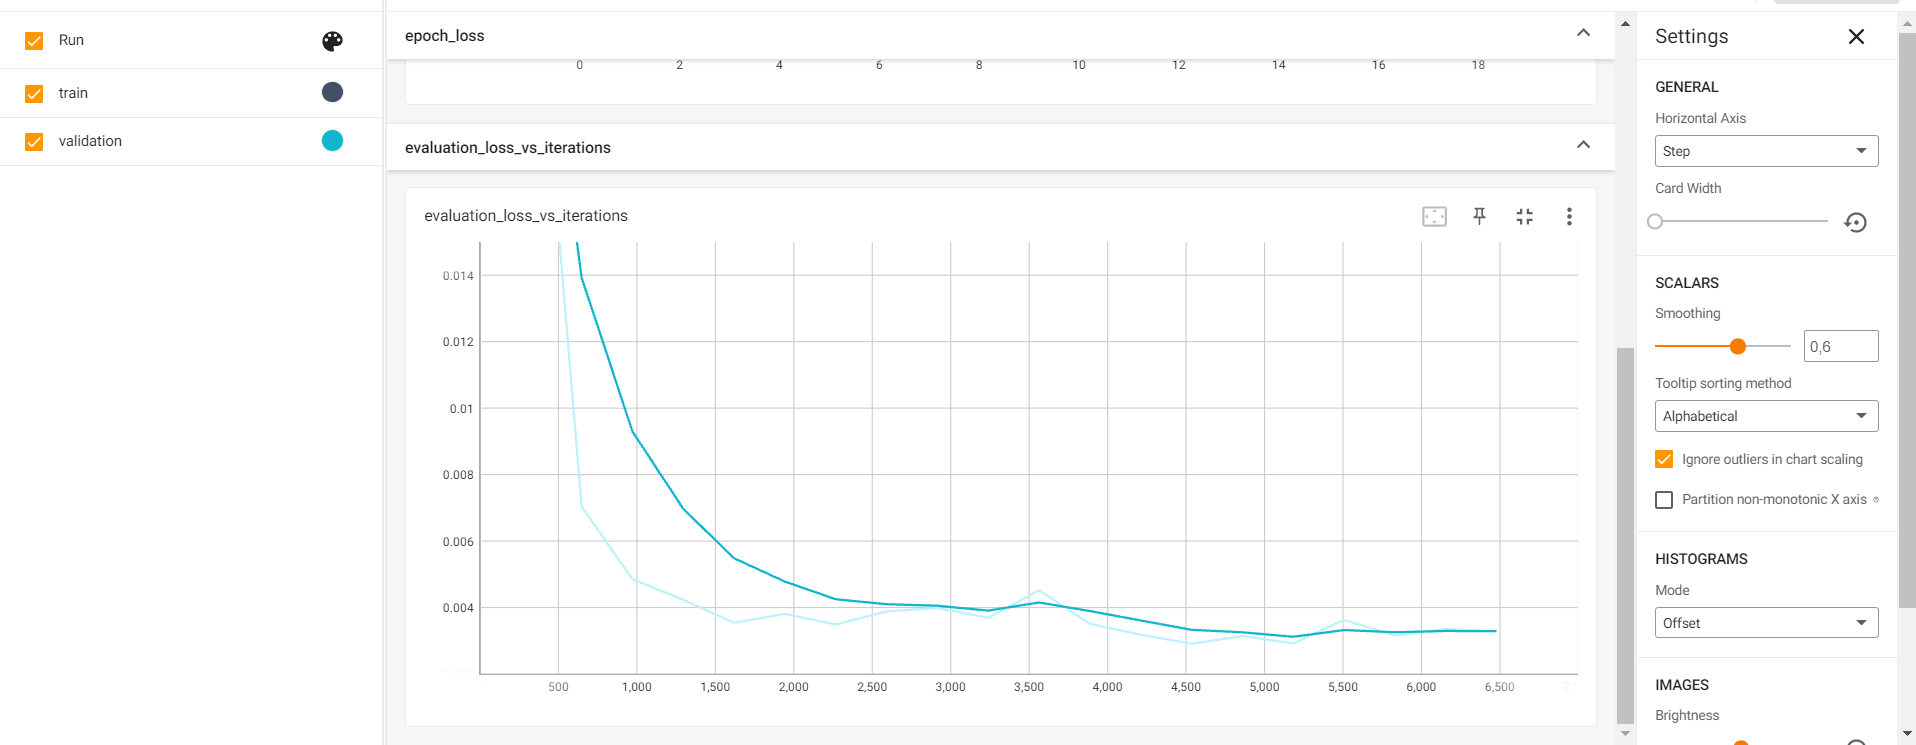

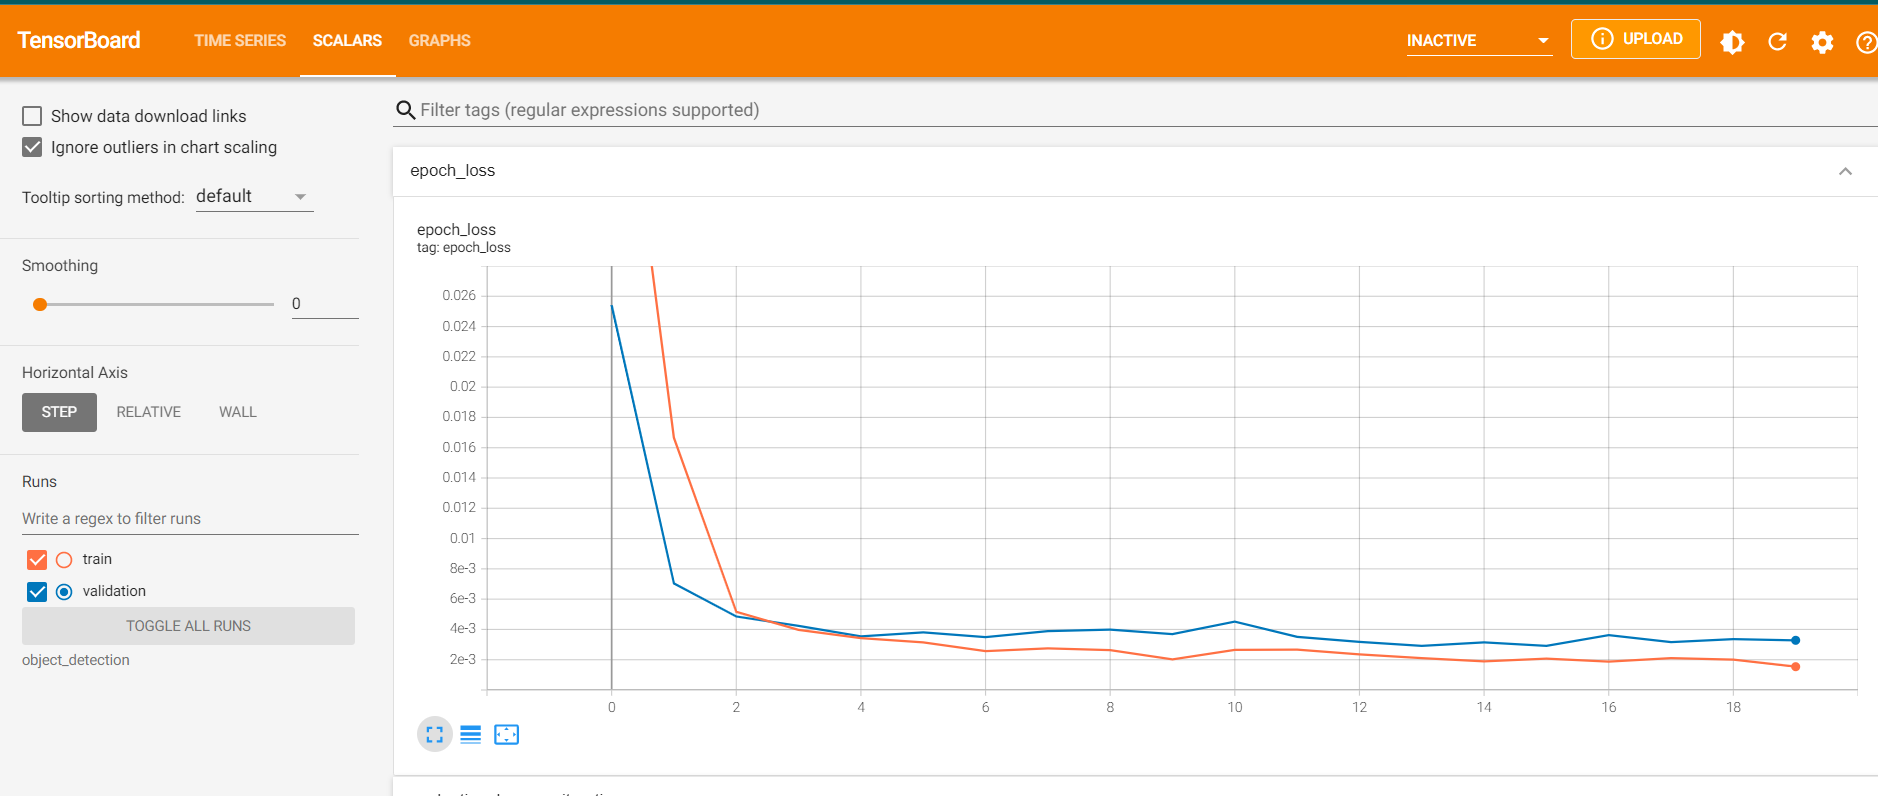

# **Save our deep learning Model**

---



In [ ]:
model.save('april_tag_detection.h1')

NameError: ignored

In [ ]:
model = tf.keras.models.load_model('../content/drive/MyDrive/april_tag_detection.h1')

In [ ]:
model.save('../content/drive/MyDrive/april_tag_detection.h1')

NameError: ignored

# ***Improving trainning (Fit our Model):***

---
This time we want to improve our trainning.
Let's try with :
*   50 epochs
*   10 batch size

In [ ]:
#fit our Model
History = model.fit(x=x_train, y=y_train, batch_size=10,epochs=50, validation_data=(x_test,y_test), callbacks=[tfb] )

Epoch 1/50
162/162 [==============================] - 571s 4s/step - loss: 0.0017 - val_loss: 0.0029
Epoch 2/50
162/162 [==============================] - 545s 3s/step - loss: 0.0013 - val_loss: 0.0027
Epoch 3/50
162/162 [==============================] - 576s 4s/step - loss: 0.0012 - val_loss: 0.0029
Epoch 4/50
162/162 [==============================] - 561s 3s/step - loss: 0.0012 - val_loss: 0.0026
Epoch 5/50
162/162 [==============================] - 524s 3s/step - loss: 0.0012 - val_loss: 0.0026
Epoch 6/50
162/162 [==============================] - 565s 3s/step - loss: 0.0012 - val_loss: 0.0026
Epoch 7/50
162/162 [==============================] - 559s 3s/step - loss: 0.0012 - val_loss: 0.0026
Epoch 8/50
162/162 [==============================] - 561s 3s/step - loss: 0.0012 - val_loss: 0.0031
Epoch 9/50
162/162 [==============================] - 561s 3s/step - loss: 0.0012 - val_loss: 0.0028
Epoch 10/50
162/162 [==============================] - 562s 3s/step - loss: 0.0013 - val_lo

# Oups, at the very last minute i had a problem that made my pc stop the excution of the trainning , the tranning was active for 5 hours. However, if you excute these code and wait for trainning you will be able to save the model.

Note : This model looks like his loss and val_loss values are stable and decreasing, this is shows that there is not an overfitting nor underfitting in the model, but beetween them, and that exactly what we are looking for !

# **Evaluation**

---



Training Done ! it took 5 hours to train. Let's plot our history loss to see the performance of our training.

In [ ]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# **Save our improved deep learning Model**

---

In [ ]:
model.save('../content/drive/MyDrive/april_tag_detection.h2')

# **Making predictions**

---



As we said earlier, for technical usues i had a problem at the last minutes that made my last trainning stop, This is why we are going to use just the first trainned model to see some predictions.

In [ ]:
#load the model
model = tf.keras.models.load_model('../content/drive/MyDrive/april_tag_detection.h1')
print('model loaded sucessfully')

model loaded sucessfully


In [ ]:
path = "../content/drive/MyDrive/images/images/img_000499.png"
image = load_img(path)
image = np.array(image,dtype=np.uint8)
image1 = load_img(path,target_size=(224,224))
image_arr_244 = img_to_array(image1)/255.0

In [ ]:
h,w,d = image.shape
print('Height of the image=',h)
print('Width of the image=',w)

Height of the image= 540
Width of the image= 720


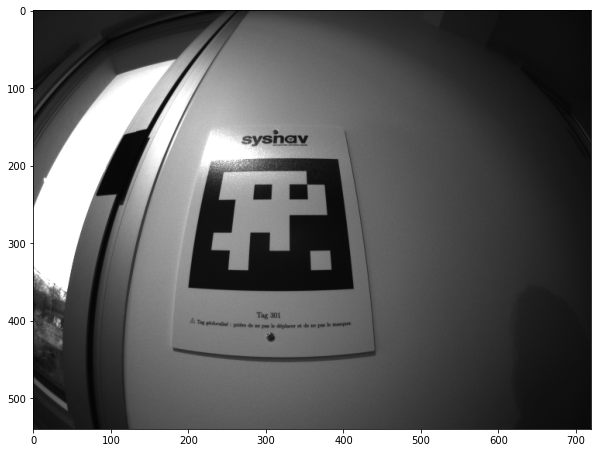

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [ ]:
image_arr_244.shape

(224, 224, 3)

In [ ]:
test_arr = image_arr_244.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [ ]:
#make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 301ms/step


array([[0.31829587, 0.36907557, 0.53080773, 0.3634686 , 0.28755856,
        0.7093177 , 0.56236947, 0.663417  ]], dtype=float32)

In [ ]:
denorm = np.array([w,h,w,h,w,h,w,h])
coords = coords * denorm
coords

array([[118713600,  58028400, 198028800,  57153600, 107308800, 111682800,
        209433600, 104392800]])

In [ ]:
coords =coords.astype(np.int32)
coords[0]

array([118713600,  58028400, 198028800,  57153600, 107308800, 111682800,
       209433600, 104392800], dtype=int32)

(107308800, 57153600) (209433600, 111682800)


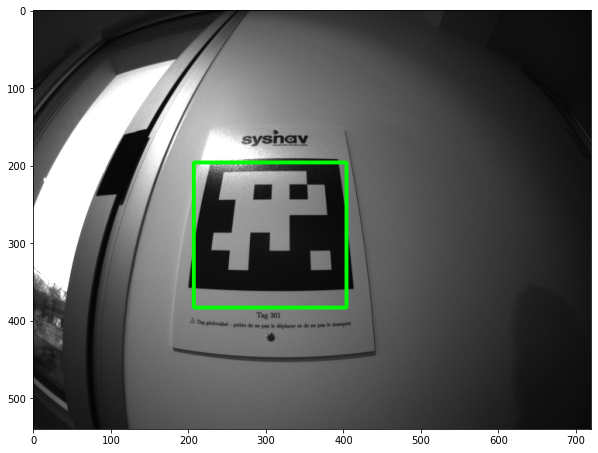

In [ ]:
xmin, xmax,ymin,ymax= coords[0][4], coords[0][6], coords[0][3], coords[0][5],
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

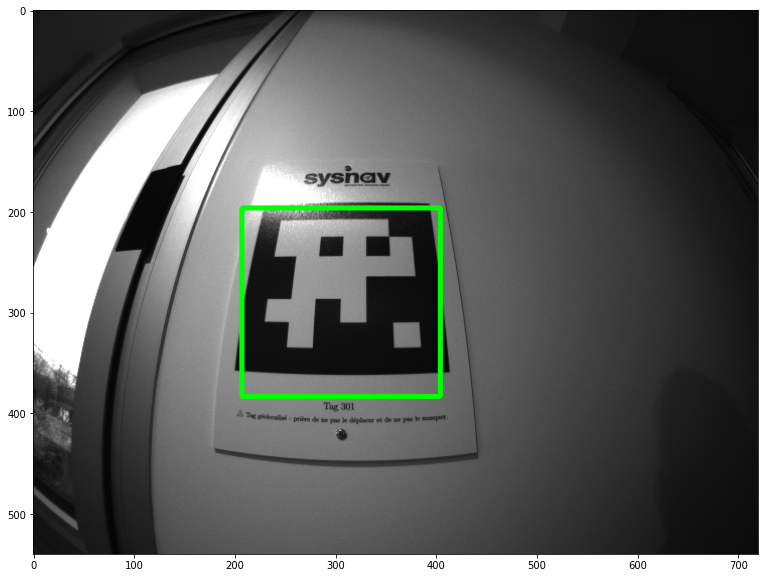

In [ ]:
upper_left_x, upper_left_y = coords[0][0] , coords[0][1]
upper_right_x, upper_right_y = coords[0][2], coords[0][3]
lower_left_x, lower_left_y = coords[0][4], coords[0][5]
lower_right_x, lower_right_y = coords[0][6], coords[0][7]
ptA = (upper_left_x, upper_left_y)
ptB = (upper_right_x, upper_right_y)
ptC = (lower_left_x, lower_left_y)
ptD = (lower_right_x, lower_right_y)
# draw the bounding box of the AprilTag detection
cv2.line(image, ptA, ptB, (0, 255, 0), 2)
cv2.line(image, ptB, ptC, (0, 255, 0), 2)
cv2.line(image, ptC, ptD, (0, 255, 0), 2)
cv2.line(image, ptD, ptA, (0, 255, 0), 2)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')

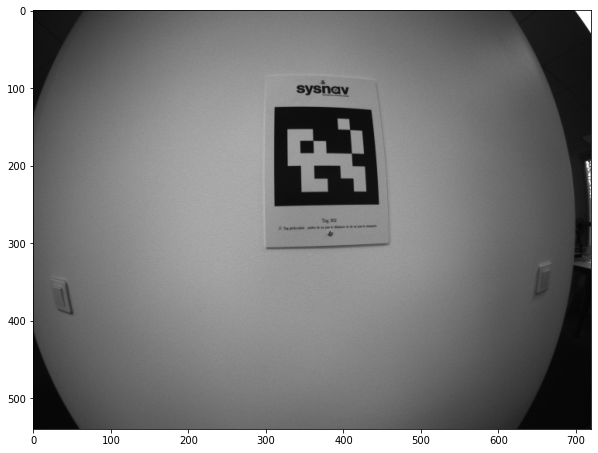

1/1 [==============================] - 0s 303ms/step


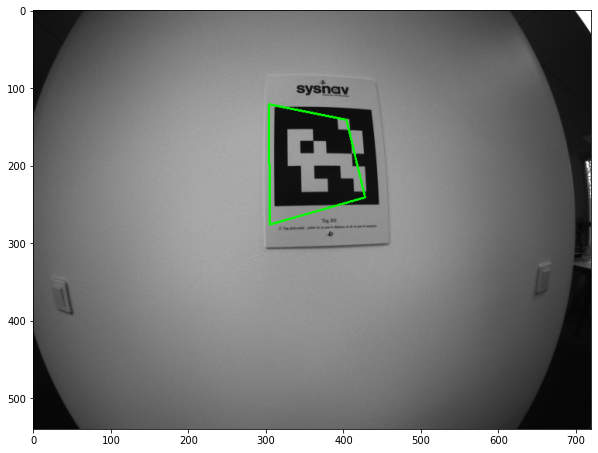

In [ ]:
def prediction(path) : # input path of the image
  image = load_img(path) # load the image
  image = np.array(image,dtype=np.uint8) # img to array
  image1 = load_img(path,target_size=(224,224))
  image_arr_244 = img_to_array(image1)/255.0
  plt.figure(figsize=(10,8))
  plt.imshow(image)
  plt.show()
  test_arr = image_arr_244.reshape(1,224,224,3)
  test_arr.shape
  #make predictions
  coords = model.predict(test_arr) # use the function predict
  denorm = np.array([w,h,w,h,w,h,w,h]) # denormalise oour coordinnates
  coords = coords * denorm
  coords =coords.astype(np.int32) # build our bounding box
  upper_left_x, upper_left_y = coords[0][0] , coords[0][1]
  upper_right_x, upper_right_y = coords[0][2], coords[0][3]
  lower_left_x, lower_left_y = coords[0][4], coords[0][5]
  lower_right_x, lower_right_y = coords[0][6], coords[0][7]
  ptA = (upper_left_x, upper_left_y)
  ptB = (upper_right_x, upper_right_y)
  ptC = (lower_right_x, lower_right_y)
  ptD = (lower_left_x, lower_left_y)
  # draw the bounding box of the AprilTag detection
  cv2.line(image, ptA, ptB, (0, 255, 0), 2)
  cv2.line(image, ptB, ptC, (0, 255, 0), 2)
  cv2.line(image, ptC, ptD, (0, 255, 0), 2)
  cv2.line(image, ptD, ptA, (0, 255, 0), 2)
  plt.figure(figsize=(10,8))
  plt.imshow(image, cmap='Greys_r')

path = "../content/drive/MyDrive/images/images/img_001350.png"
prediction(path)

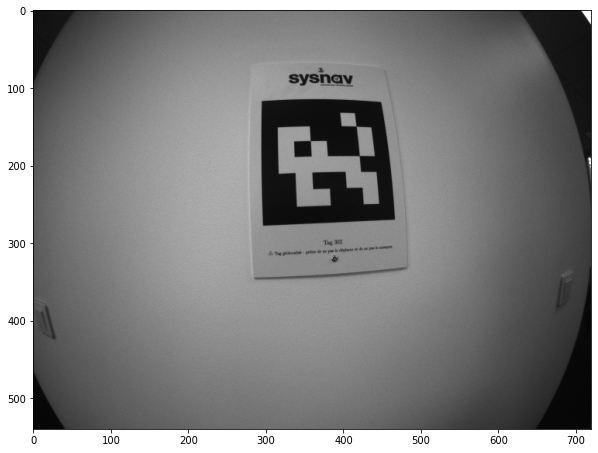

1/1 [==============================] - 0s 340ms/step


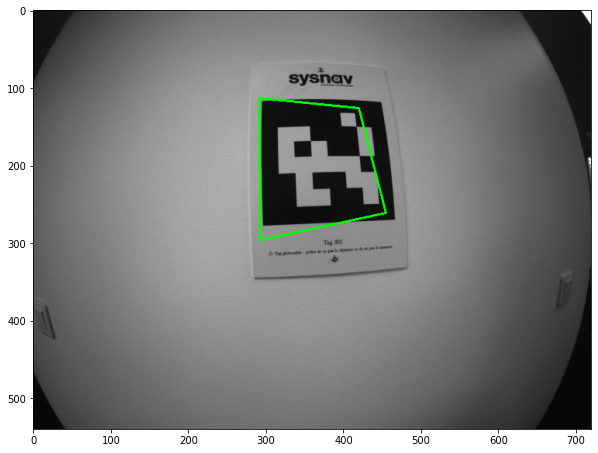

In [ ]:
path = "../content/drive/MyDrive/images/images/img_001355.png"
prediction(path)

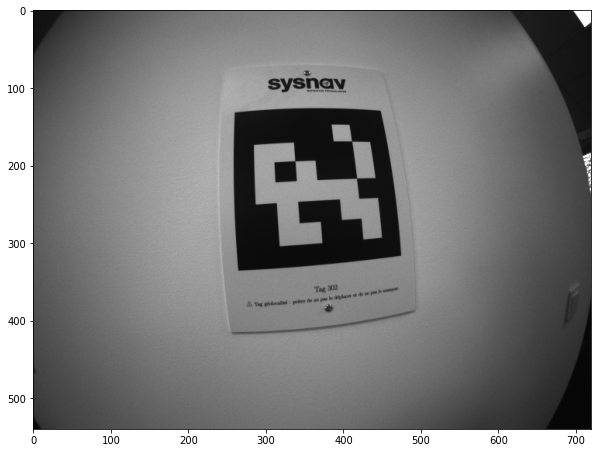

1/1 [==============================] - 0s 288ms/step


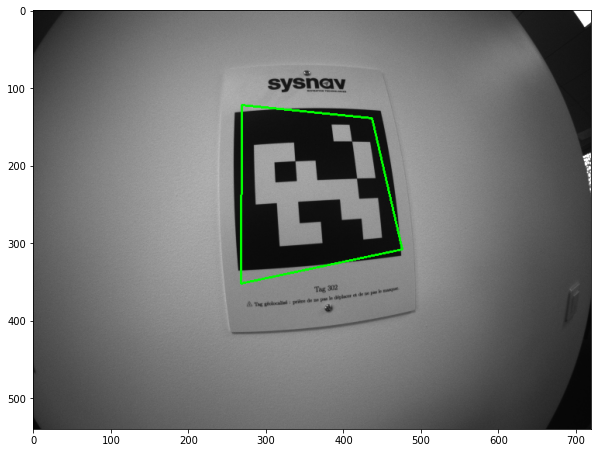

In [ ]:
path = "../content/drive/MyDrive/images/images/img_001359.png"
prediction(path)

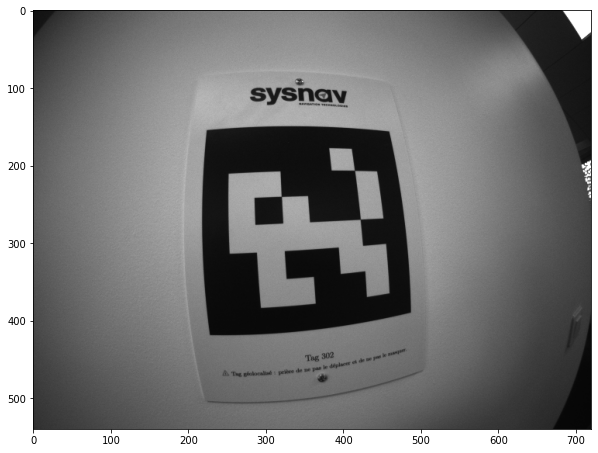

1/1 [==============================] - 0s 263ms/step


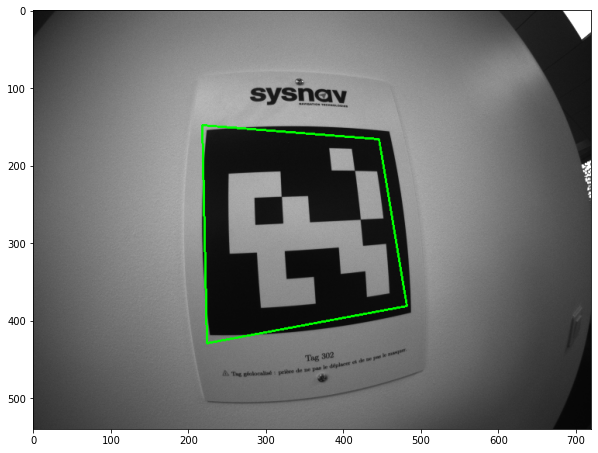

In [ ]:
path = "../content/drive/MyDrive/images/images/img_001365.png"
prediction(path)

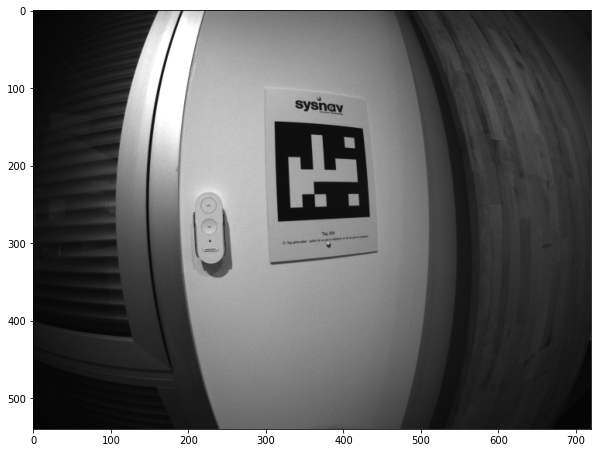

1/1 [==============================] - 0s 261ms/step


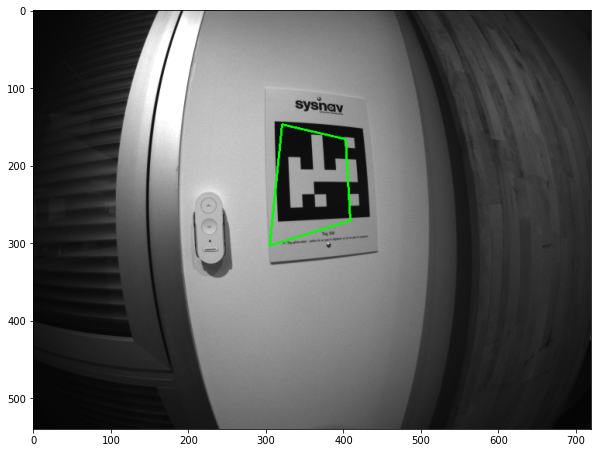

In [ ]:
path = "../content/drive/MyDrive/images/images/img_001780.png"
prediction(path)

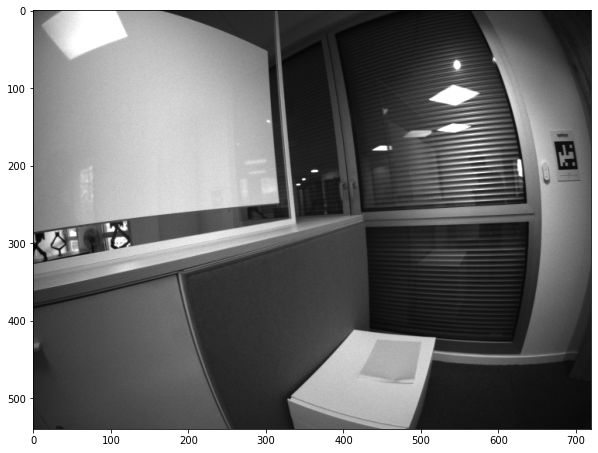

1/1 [==============================] - 0s 290ms/step


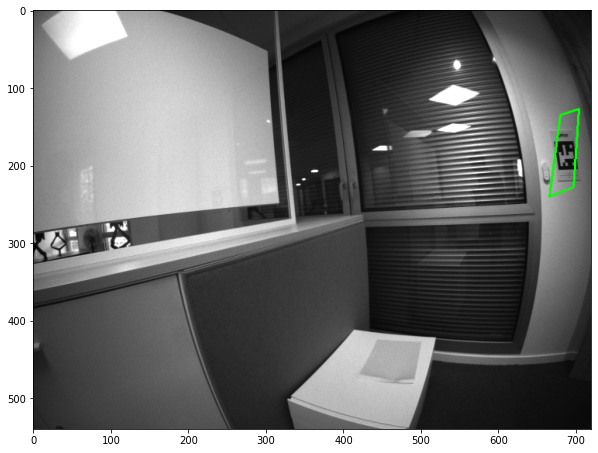

In [ ]:
path = "../content/drive/MyDrive/images/images/img_001900.png"
prediction(path)

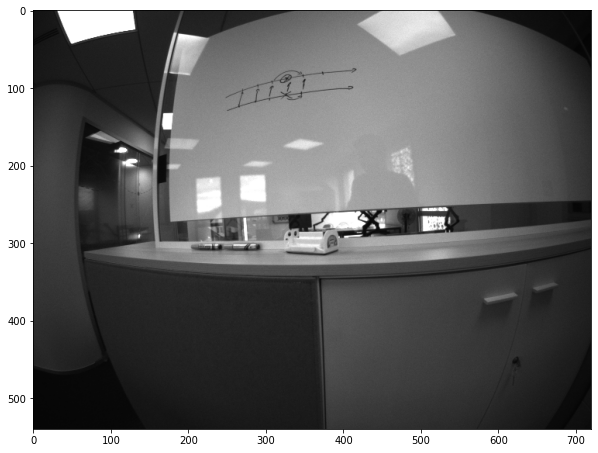

1/1 [==============================] - 0s 261ms/step


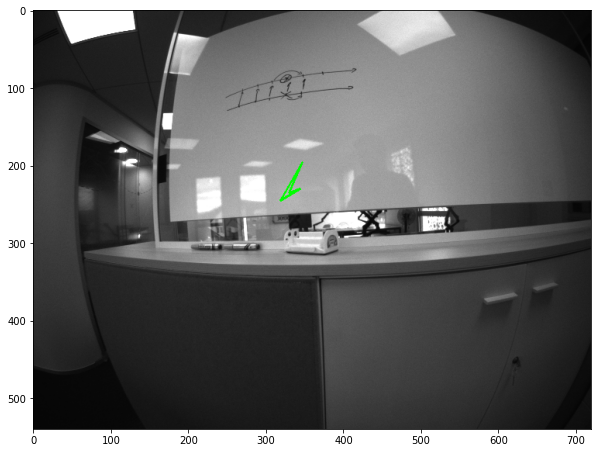

In [ ]:
path = "../content/drive/MyDrive/images/images/img_001916.png"
prediction(path)

# **Conclusion and persepectives**

---



As we see we managed to detect tags. However, with images that does not contain april tags, our model detect random objects. this is something that we expected since we trainned our model only on images that contains the tags

To solve this issue we need to train our Model on all the dataset in order to classify images. **(it's a classification problem)**

We could also improve our model by augmentation data method and increasing the number of tranning epochs.


